<a href="https://colab.research.google.com/github/sravankaviti/EDA/blob/main/22BDS0324_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NAME :- K.SRAVAN
# REGNO:- 22BDS0324
# CO5: Apply Techniques for handling multi-dimensional data.


In [3]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [10]:
# 1.Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [30]:
# 2.Loading Dataset
df = pd.read_csv("Suicide data.csv")
print(df)

          country  year     sex          age  suicides_no  population  \
0         Albania  1987    male  15-24 years           21      312900   
1         Albania  1987    male  35-54 years           16      308000   
2         Albania  1987  female  15-24 years           14      289700   
3         Albania  1987    male    75+ years            1       21800   
4         Albania  1987    male  25-34 years            9      274300   
...           ...   ...     ...          ...          ...         ...   
27815  Uzbekistan  2014  female  35-54 years          107     3620833   
27816  Uzbekistan  2014  female    75+ years            9      348465   
27817  Uzbekistan  2014    male   5-14 years           60     2762158   
27818  Uzbekistan  2014  female   5-14 years           44     2631600   
27819  Uzbekistan  2014  female  55-74 years           21     1438935   

       suicides/100k pop    country-year  HDI for year  gdp_for_year ($)   \
0                   6.71     Albania1987      

In [12]:
# 3.Dimensions of Dataset

print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])


Number of Rows: 27820
Number of Columns: 12


In [13]:
# 4.Summary Statistics

print("\n--- Data Types ---")
print(df.dtypes)

print("\n--- First 5 Rows ---")
print(df.head())

print("\n--- Summary Statistics (Numerical) ---")
print(df.describe())

print("\n--- Summary Statistics (Categorical) ---")
print(df.describe(include='object'))


--- Data Types ---
country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

--- First 5 Rows ---
   country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN

In [14]:
# 5.Data Handling=
print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Duplicate Rows ---")
print(df.duplicated().sum())



--- Missing Values ---
country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

--- Duplicate Rows ---
0


In [16]:
# 6. Data Cleaning

# Remove duplicates
df.drop_duplicates(inplace=True)

# Handle missing HDI values
df["HDI for year"] = df["HDI for year"].fillna(df["HDI for year"].mean())

# Fix column names: remove leading/trailing spaces
df.columns = df.columns.str.strip()

# Convert GDP to numeric
df["gdp_for_year ($)"] = df["gdp_for_year ($)"].replace({",": ""}, regex=True).astype(float)


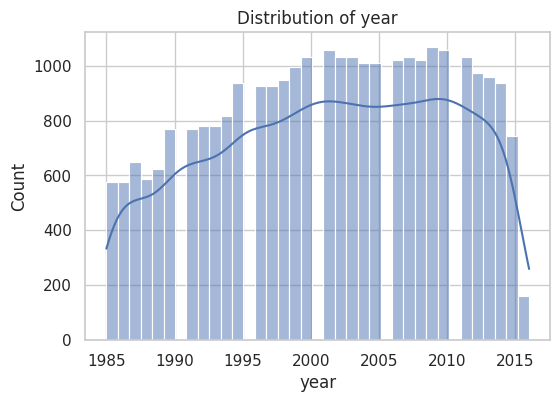

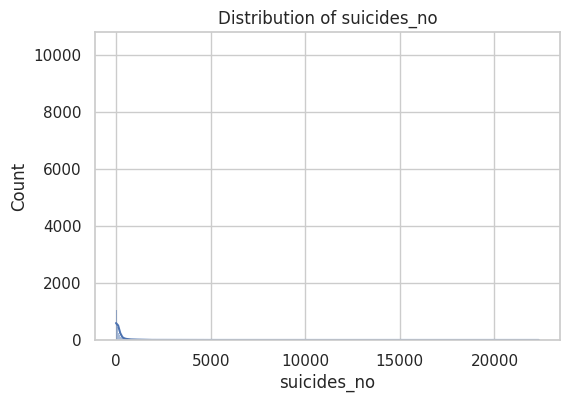

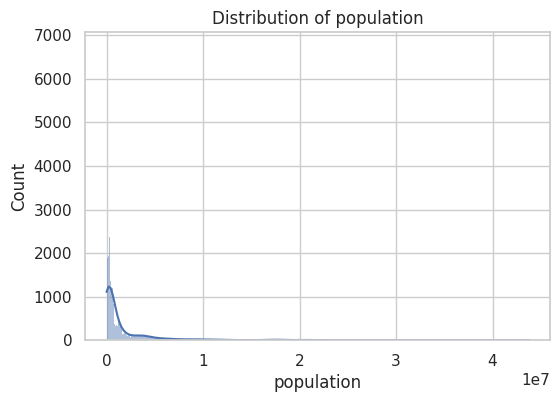

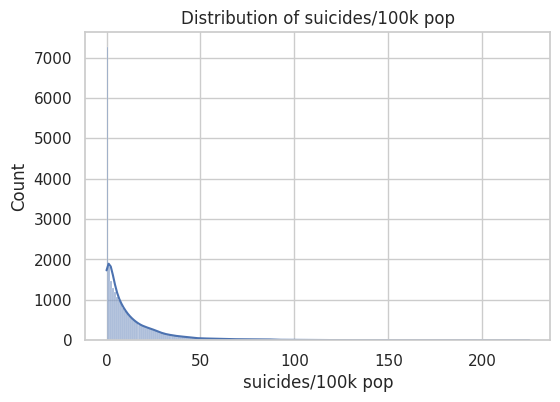

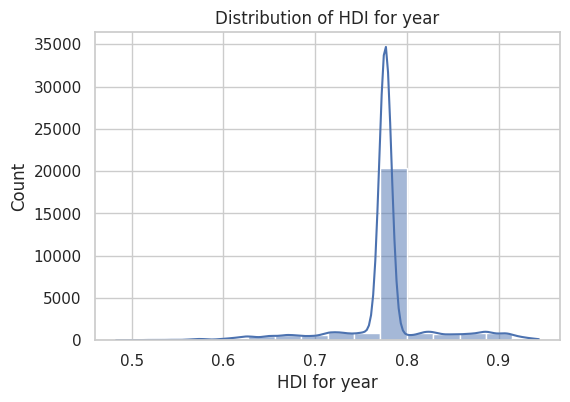

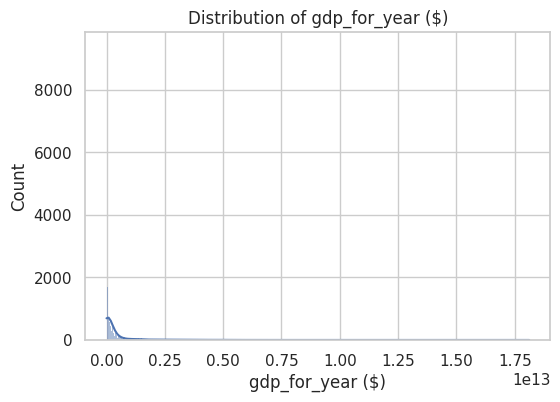

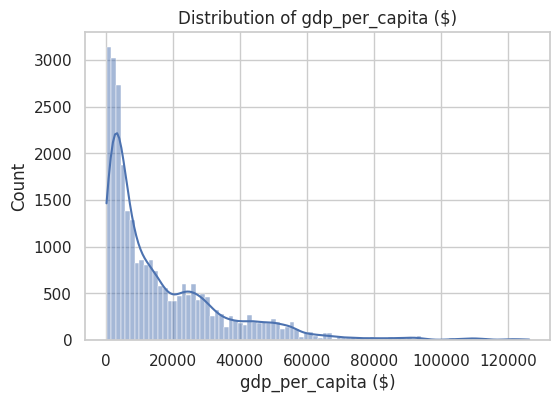

In [22]:
# 7. Univariate Analysis

# Numerical Features Distribution
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()




/tmp/ipython-input-3339924065.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories.index, x=top_categories.values, palette="Blues_d")


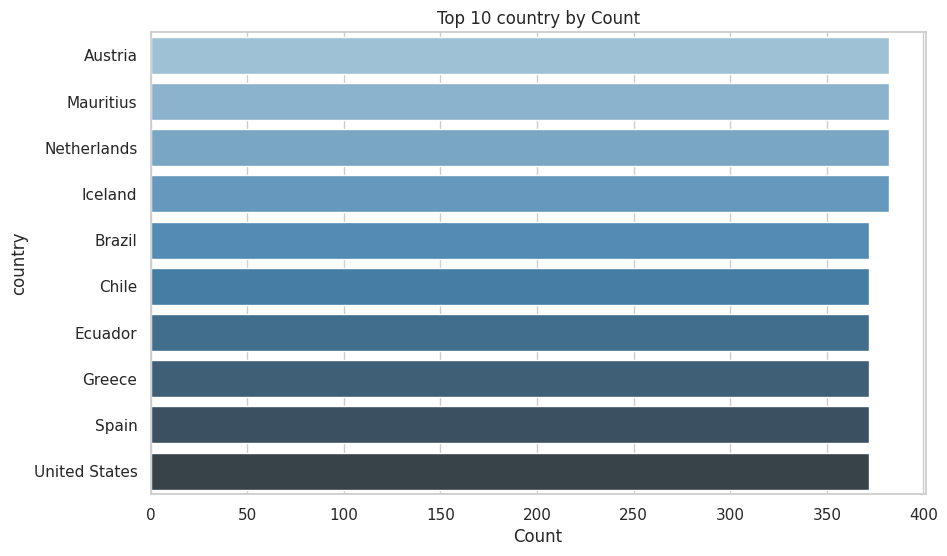

/tmp/ipython-input-3339924065.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="Blues_d")


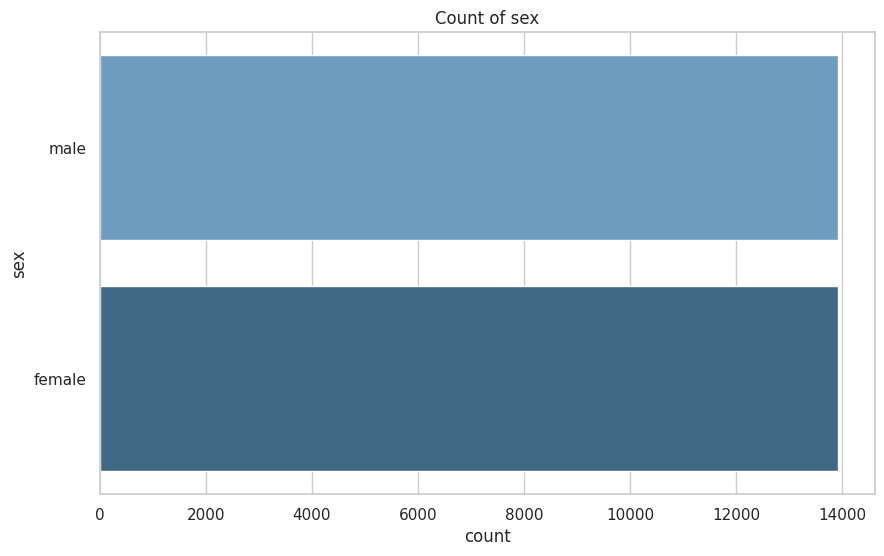

/tmp/ipython-input-3339924065.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="Blues_d")


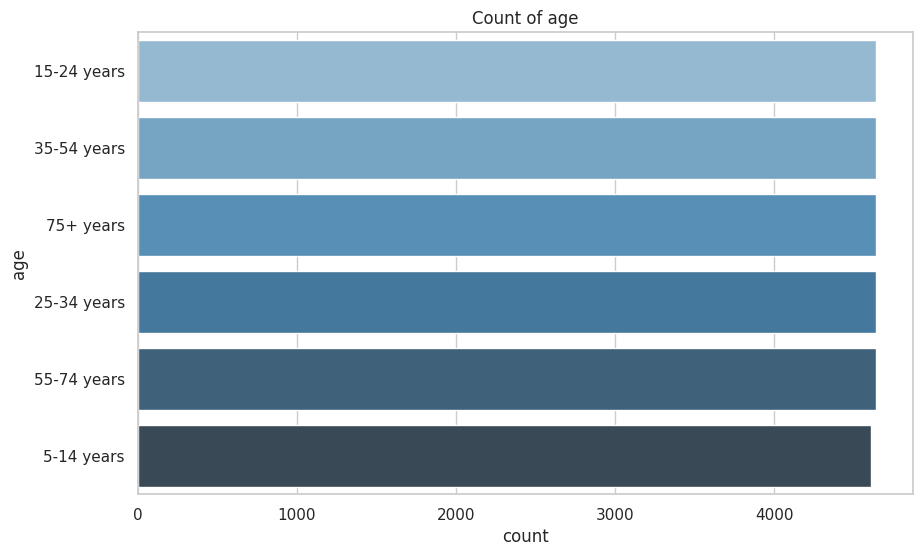

/tmp/ipython-input-3339924065.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories.index, x=top_categories.values, palette="Blues_d")


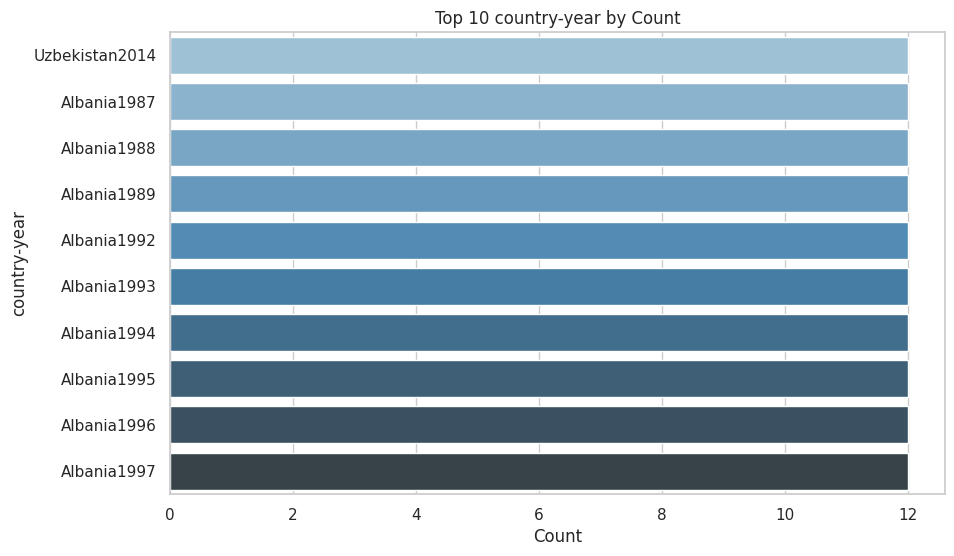

/tmp/ipython-input-3339924065.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="Blues_d")


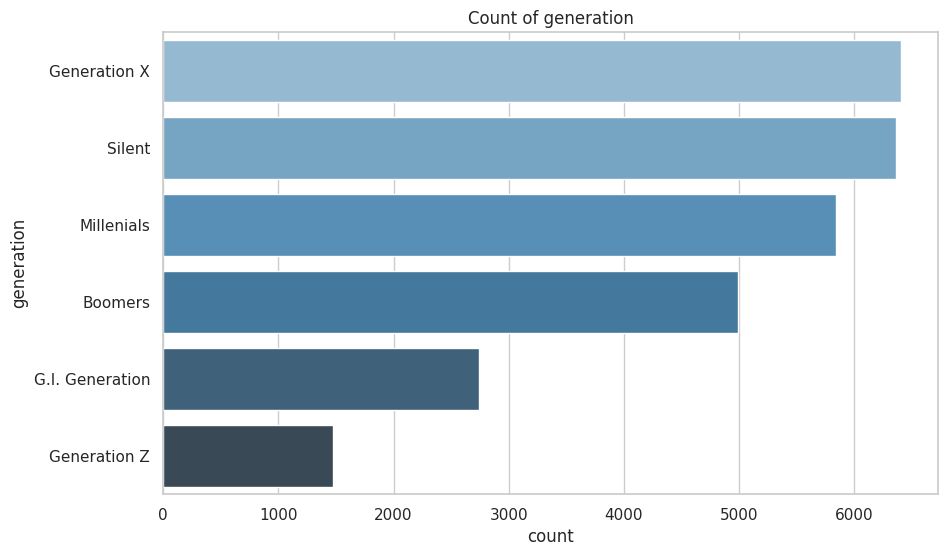

In [23]:
# Categorical Features Countplot (Top 10 if too many)
cat_cols = df.select_dtypes(exclude=np.number).columns
for col in cat_cols:
    plt.figure(figsize=(10,6))
    if df[col].nunique() > 10:
        top_categories = df[col].value_counts().head(10)
        sns.barplot(y=top_categories.index, x=top_categories.values, palette="Blues_d")
        plt.title(f"Top 10 {col} by Count")
        plt.xlabel("Count")
        plt.ylabel(col)
    else:
        sns.countplot(y=df[col], order=df[col].value_counts().index, palette="Blues_d")
        plt.title(f"Count of {col}")
    plt.show()

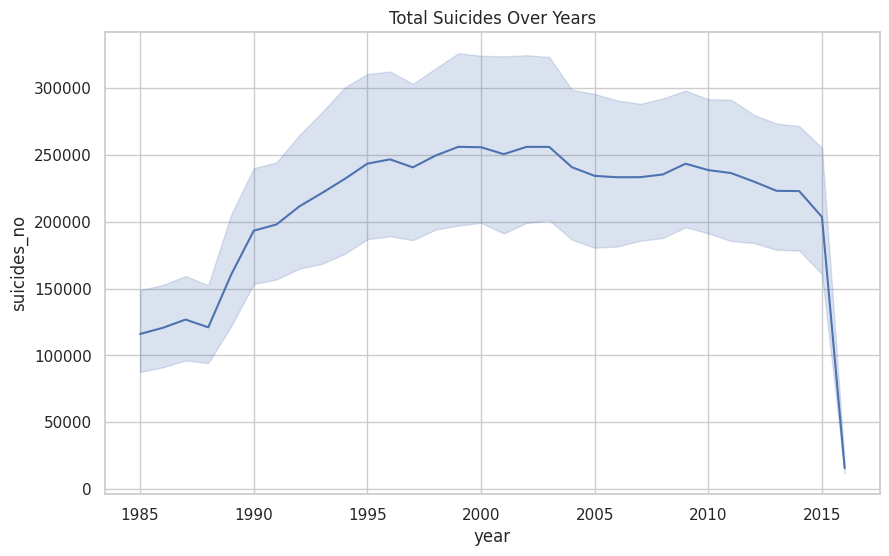

In [24]:
# 8. Bivariate Analysis

# Suicides over Years
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x="year", y="suicides_no", estimator='sum')
plt.title("Total Suicides Over Years")
plt.show()




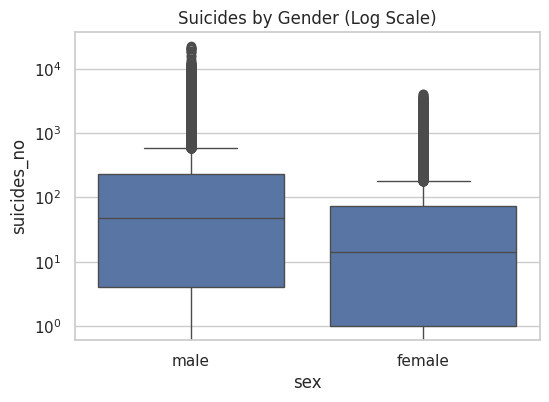

In [26]:
# Suicides by Gender
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="sex", y="suicides_no")
plt.yscale('log')
plt.title("Suicides by Gender (Log Scale)")
plt.show()


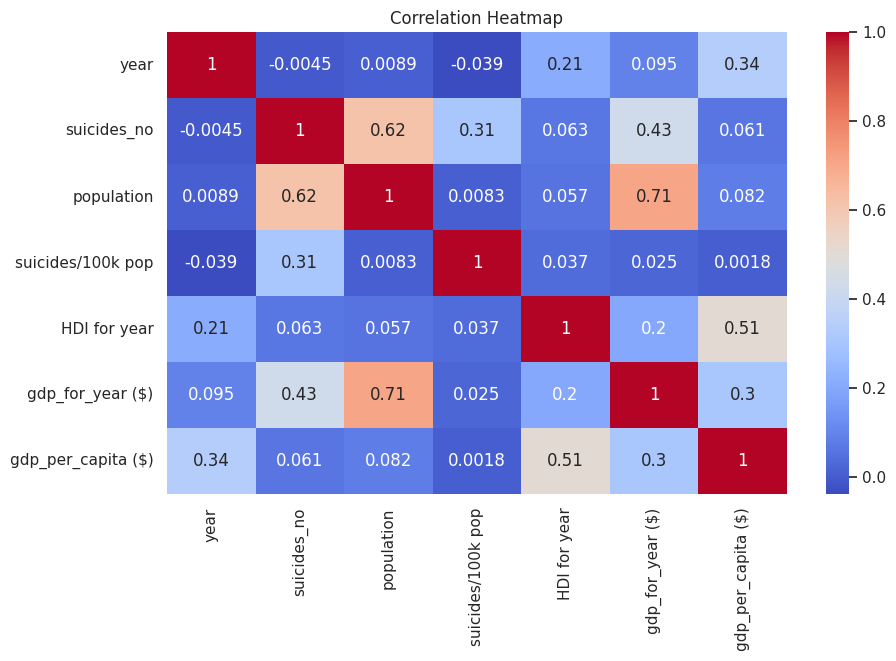

In [28]:
# 9. Multivariate Analysis
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

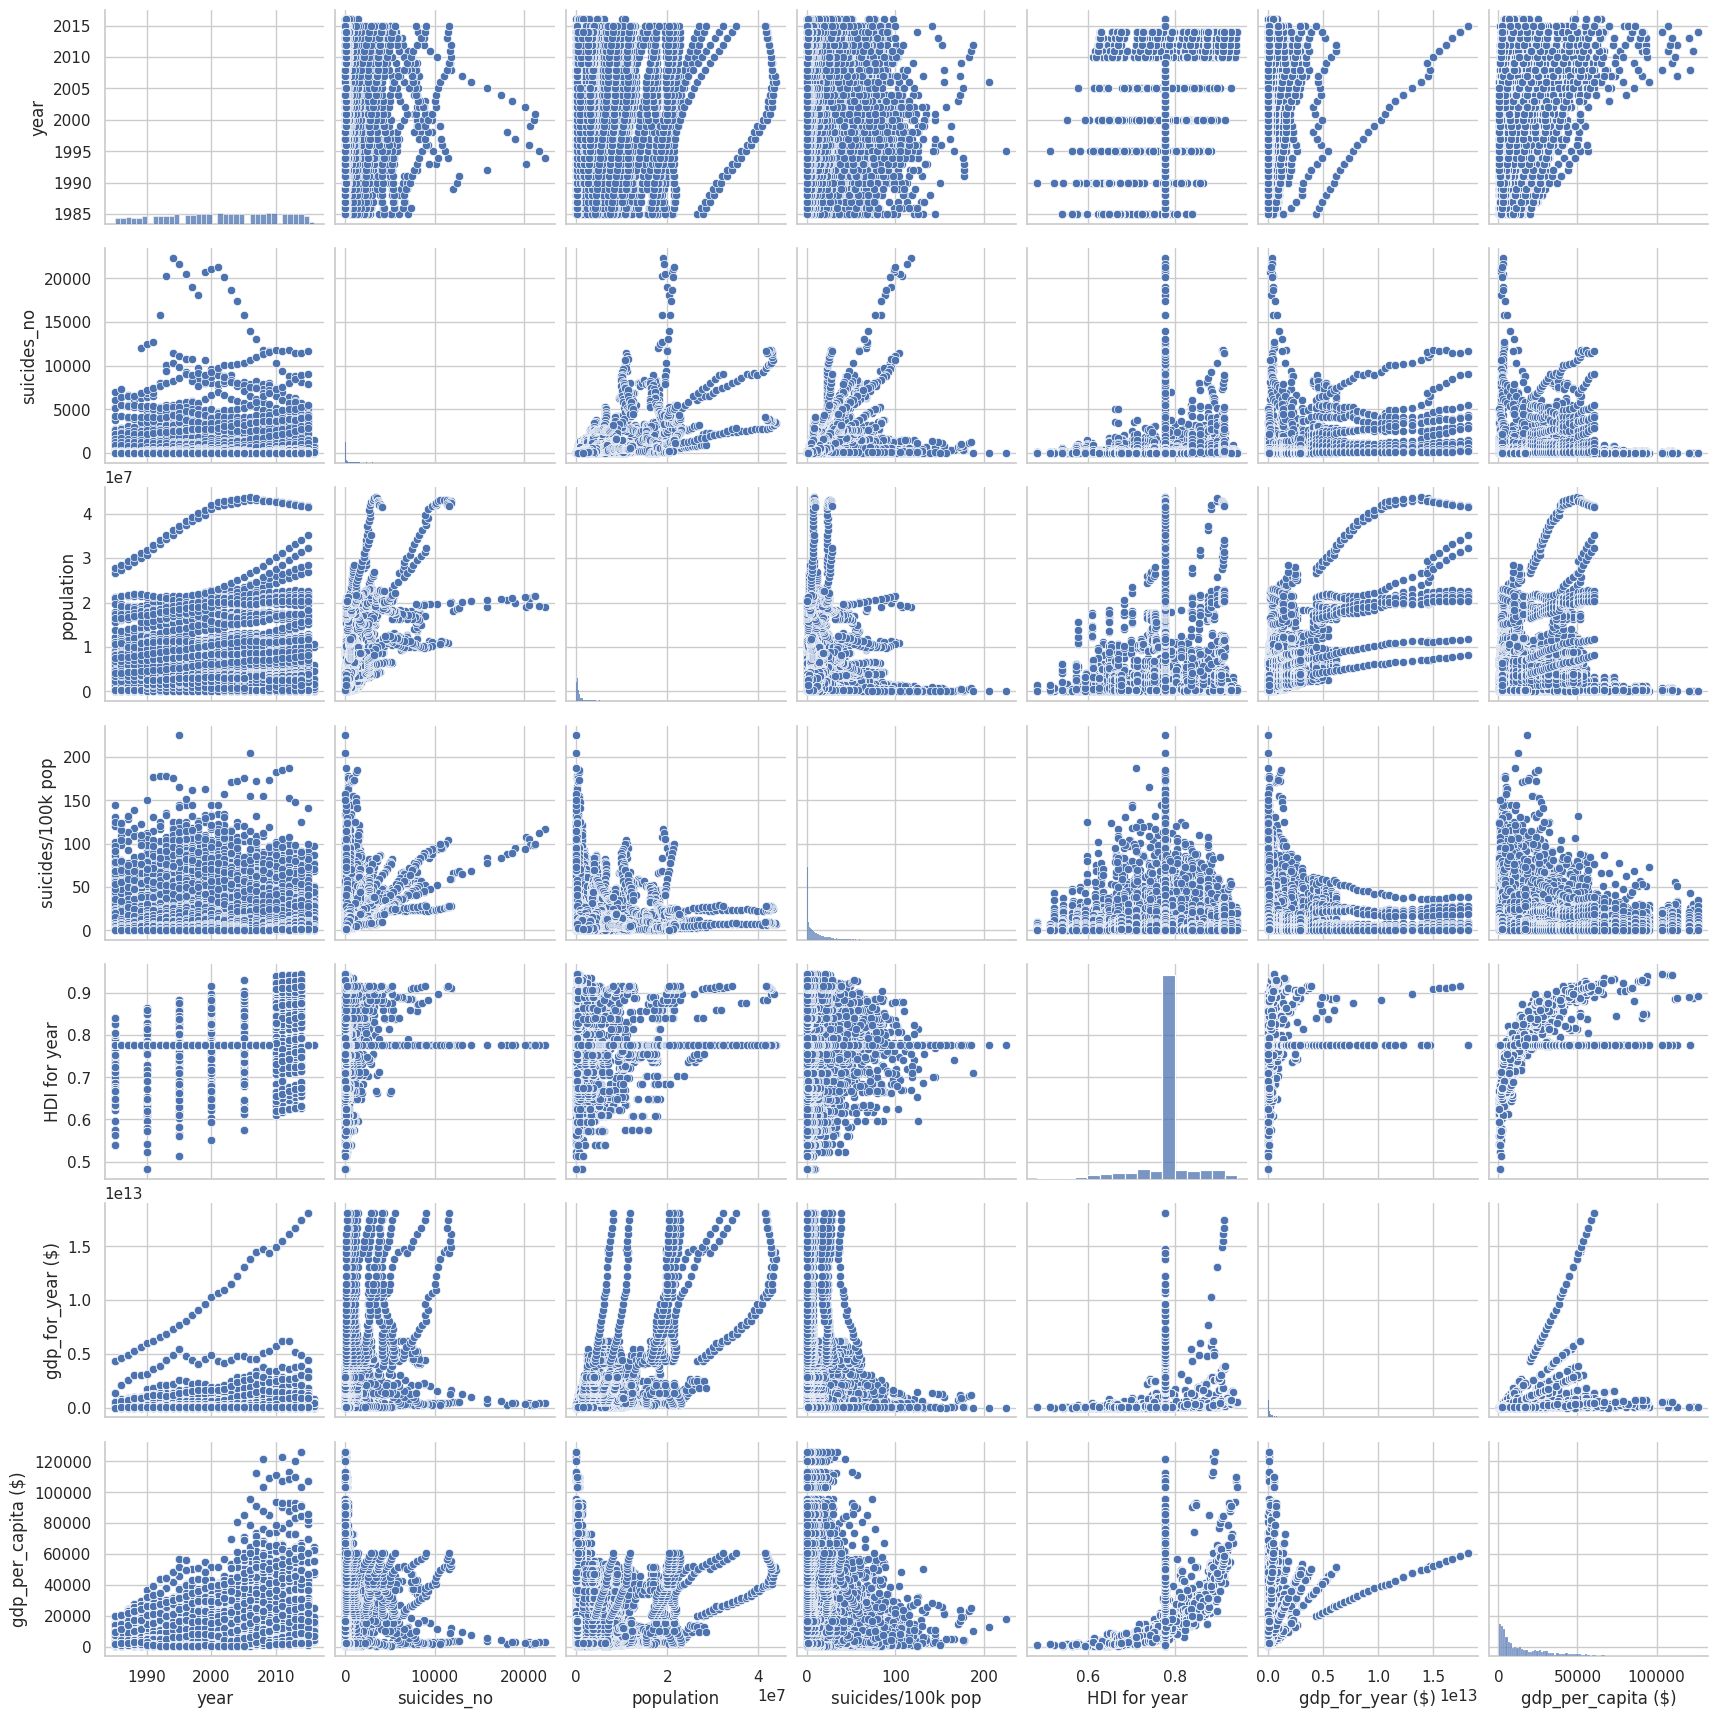

In [29]:
# Pairplot
sns.pairplot(df[num_cols])
plt.show()